# Step2: 1D Nonlinear Convection

Now we're going to implement nonlinear convection using the same methods as in step 1. The 1D convection equation is:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0$$

Instead of a constant factor $c$ multiplying the second term, now we have the solution $u$ multiplying it. Thus, the second term of the equation is now _nonlinear_. We're going to use the same discretization as in Step 1 — forward difference in time and backward difference in space. Here is the discretized equation.

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n-u_{i-1}^n}{\Delta x} = 0$$

Solving for the only unknown term, $u_i^{n+1}$, yields:

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n)$$


In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = "svg"
import matplotlib.pyplot as plt
import matplotlib.animation as anim
plt.rcParams["animation.html"] = "html5"

In [37]:
x_domain_interval: tuple[float] = (0, 2.0)
nx: int = 101
dx: float = 2.0 / (nx - 1.0)
nt: int = 40
sigma: float = 0.5  # sigma = u * dt / dx
dt: float = sigma * dx

# Spatial Doamin
x = np.linspace(*x_domain_interval, nx)

As before, the Python code starts by loading the necessary libraries. Then, we declare some variables that determine the discretization in space and time (you should experiment by changing these parameters to see what happens). Then, we create the initial condition $u_0$ by initializing the array for the solution using $u = 2\ @\ 0.5 \leq x \leq 1$ and $u = 1$ everywhere else in $(0,2)$ (i.e., a hat function).


In [38]:
u = np.ones(nx)
u[int(0.5 / dx) : int(1.0 / dx + 1.0)] = 2.0
u0 = u.copy()

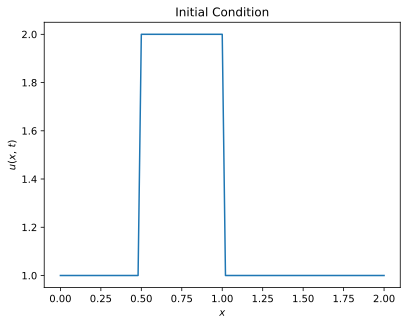

In [39]:
fig, ax = plt.subplots()
(_,) = ax.plot(x, u0)
ax.set_title("Initial Condition")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$u(x,\,t)$")
plt.show()

In [40]:
u = np.ones(nx)
# setting u = 2 between 0.5 and 1 as per our I.C.s
u[int(0.5 / dx) : int(1.0 / dx + 1.0)] = 2.0

solutions = []
solutions.append(u0)

# Loop for values of n from 0 to nt, so it will run nt times
for n in range(nt):
    u[1:-1] = u[1:-1] - u[1:-1] * dt / dx * (u[1:-1] - u[:-2])
    solutions.append(u.copy())

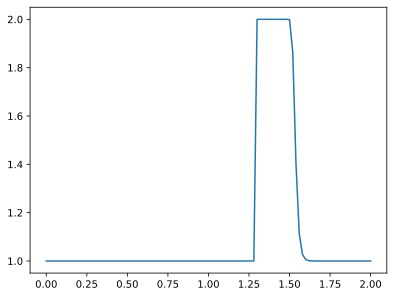

In [41]:
plt.plot(x, u)

In [45]:
fig, ax = plt.subplots()

lines = ax.plot(x, u0, "k-")
line = lines[0]
ax.set_ylim([0.95, 2.05])
plt.grid()
plt.close()


def update_anim(frame):
    line.set_ydata(solutions[frame])
    ax.set_title(f"Time: {float(frame)}")
    return (line,)


ani = anim.FuncAnimation(
    fig=fig, func=update_anim, frames=len(solutions), interval=100, blit=True
)
ani